In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [8]:
df = pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


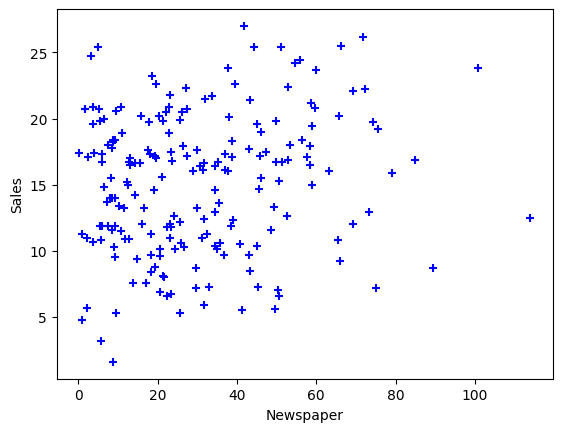

In [10]:
%matplotlib inline
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.scatter(df.Newspaper , df.Sales , color = 'blue' , marker =  '+')

In [11]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [13]:
x = df[['TV' , 'Radio' , 'Newspaper']]
y =  df['Sales']

Model = LinearRegression()
Model.fit(x,y)

LinearRegression()

In [17]:
y_predict = Model.predict(x)
y_predict

array([21.22097209, 11.26824775, 10.49620897, 17.31244651, 15.64413685,
       10.35633677, 11.2732847 , 13.27062458,  5.31839603, 15.78871013,
        8.8527202 , 18.88400523,  9.69879662, 10.74921373, 19.27328852,
       20.38554445, 12.27105794, 24.20214502, 10.5924398 , 15.20872794,
       19.49794066, 18.10414656,  7.06177654, 18.87221072,  9.37145421,
       19.31996936, 15.54479137, 19.49216302, 21.07865408, 10.19471067,
       23.61492832, 12.64683045, 10.08782551, 21.2260486 ,  9.98787085,
       20.89407055, 23.84503494, 13.99342411,  9.8404516 , 21.08344935,
       18.04712878, 17.84885818, 23.57494339, 16.79762772,  8.75617872,
       16.57668108, 10.58020572, 22.13342743, 18.70257411,  9.53181337,
       15.84670856, 11.11990058, 20.88243422, 19.53008343, 22.01500291,
       20.76038994,  8.04320903, 14.10063486, 21.4222098 , 19.25650785,
        7.75915886, 23.43911942, 19.32168181, 13.3867616 , 16.35231896,
        9.37729644,  8.97313482, 13.7643628 , 20.49677834, 21.13

In [19]:
meansqrt = mean_squared_error(y,y_predict)
meansqrt

2.706006147627315

In [23]:
acc = r2_score(y,y_predict)
acc

0.9025912899684558

In [24]:
Model.intercept_

4.625124078808653

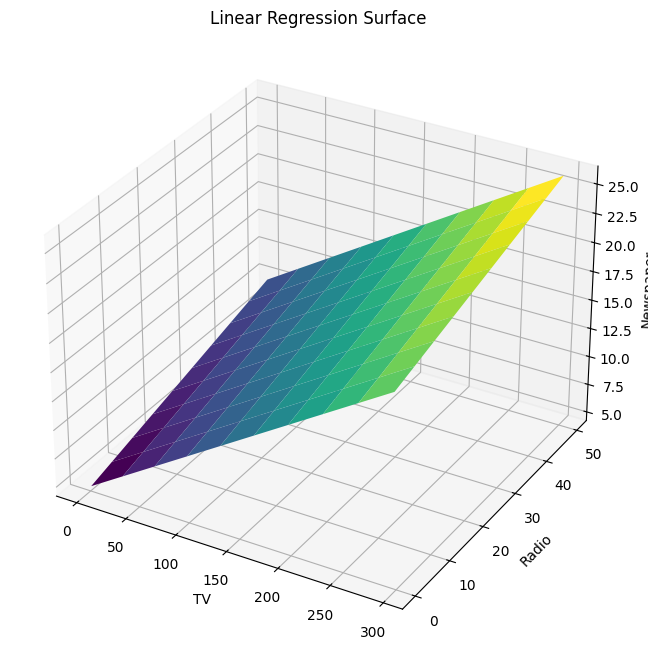

In [29]:
from mpl_toolkits.mplot3d import Axes3D
#Creating Mesh Grid for TV and Radio
tv_range = np.linspace(x['TV'].min(), x['TV'].max(), 10)
radio_range = np.linspace(x['Radio'].min(), x['Radio'].max(), 10)
tv_grid, radio_grid = np.meshgrid(tv_range, radio_range)

#Predicting value of Newspaper from the model   y = m1*tv + m2* radio + b(intercept)
newspaper_grid = Model.intercept_ + Model.coef_[0] * tv_grid + Model.coef_[1] * radio_grid

fig = plt.figure(figsize=(11,8))
smt = fig.add_subplot(111, projection = '3d')
#Plotting the surfae

smt.plot_surface(tv_grid , radio_grid , newspaper_grid , cmap = 'viridis' , edgecolor = 'none')

#Setting Labels
smt.set_xlabel('TV')
smt.set_ylabel('Radio')
smt.set_zlabel('Newspaper')
smt.set_title('Linear Regression Surface')

plt.show()

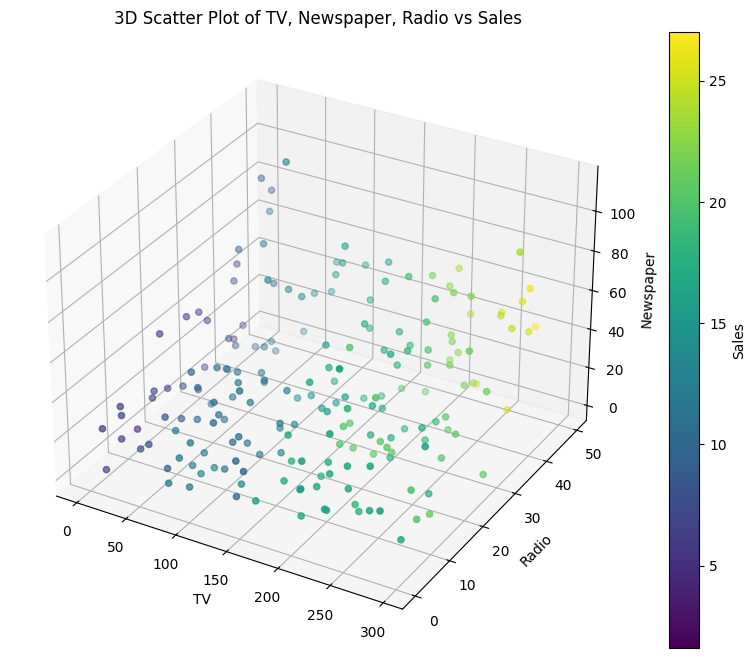

In [34]:
# 3D Scatter Plot where TV, Newspaper, and Radio are on the axes and Sales is represented by color intensity

fig = plt.figure(figsize=(11,8))
smt = fig.add_subplot(111,projection = '3d')

# Scatter plot with colors corresponding to Sales
img = smt.scatter (x['TV'] ,x['Radio'], x['Newspaper'] , c=y,cmap='viridis')

smt.set_xlabel('TV')
smt.set_ylabel('Radio')
smt.set_zlabel('Newspaper')
smt.set_title('3D Scatter Plot of TV, Newspaper, Radio vs Sales')
#Adding ColorBar
fig.colorbar(img, label = 'Sales')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


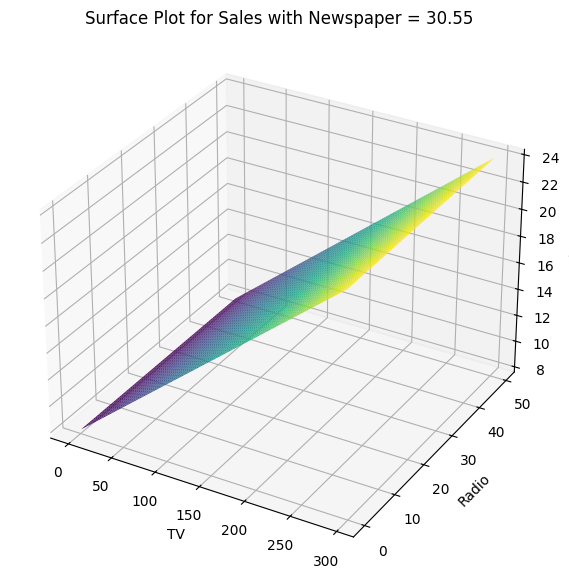

In [37]:
# 4D Surface Plot with one variable held constant (e.g., Newspaper = mean of the data)
# Create meshgrid for TV and Radio
tv_range = np.linspace(x['TV'].min(), x['TV'].max(), 100)
radio_range = np.linspace(x['Radio'].min(), x['Radio'].max(), 100)
tv_grid, radio_grid = np.meshgrid(tv_range, radio_range)

# Predicting sales for each combination of TV and Radio using model , Setting Newspaper to fixed value
newspaper_value = x['Newspaper'].mean()
sales_grid = Model.predict(np.c_[tv_grid.ravel(), np.full_like(tv_grid.ravel(), newspaper_value), radio_grid.ravel()])

# Reshape sales_grid to match the meshgrid shape
sales_grid = sales_grid.reshape(tv_grid.shape)

# Plotting the 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plottig the surface
ax.plot_surface(tv_grid, radio_grid, sales_grid, cmap='viridis', edgecolor='none')
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')
ax.set_title(f"Surface Plot for Sales with Newspaper = {newspaper_value:.2f}")

plt.show()